In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import spacy
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import matplotlib.pyplot as plt


In [ ]:
nlp = spacy.load("en_core_web_sm")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
det1 = pd.read_csv('before last.csv')
det2 = pd.read_csv('det.csv')
det3 = pd.read_csv('details.csv')

In [ ]:
det12 = det1.combine_first(det2)
det = det12.combine_first(det3)

In [ ]:
det.info()
print(det.head())
print(len(det))
print(det.isna().sum())

descr = det[det['description'].notna()]
print(len(descr))
print(descr.isna().sum())

payment = det[det['payment'].notna()]
print(len(payment))
print(payment.isna().sum())
payment.loc[:, 'payment'] = payment['payment'].str.replace(r'/yr|\$','', regex=True)
print(payment.head())

details = det[det['details'].notna()]
print(len(details))
print(details.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 298
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   href         299 non-null    object
 1   payment      127 non-null    object
 2   description  228 non-null    object
 3   details      184 non-null    object
dtypes: object(4)
memory usage: 11.7+ KB
                                                href  \
0  https://www.linkedin.com/jobs/view/data-analys...   
1  https://www.linkedin.com/jobs/view/data-scient...   
2  https://www.linkedin.com/jobs/view/data-scient...   
3  https://www.linkedin.com/jobs/view/data-scient...   
4  https://www.linkedin.com/jobs/view/bi-develope...   

                           payment  \
0    $56,000.00/yr - $70,000.00/yr   
1  $140,000.00/yr - $175,000.00/yr   
2  $140,000.00/yr - $235,000.00/yr   
3  $123,200.00/yr - $196,800.00/yr   
4  $112,000.00/yr - $185,000.00/yr   

                                         descrip

# **Description Analysis: skill extract**

In [ ]:
#i'm gonna use a function with "apply" rather than a for loop with column.items() well cuz it's faster to complete the task
def cleaning_time(t):
  no = re.sub(r'[^a-zA-Z\s]', '', str(t))
  no_low = no.lower()
  text = nlp(no_low)
  tokens = ' '.join([token.text for token in text if token.text not in stop_words])
  return tokens

descr.loc[:,'descr'] = descr['description'].str.replace(r'\n|\#',' ', regex = True)
descr.loc[:,'description_cleeeean'] = descr['descr'].apply(lambda x : cleaning_time(x))

In [ ]:
from math import nan
from collections import Counter
#static dictionary containing all related skills to "data science" since it's the job that i'm scraping
skills_dict = [
    "python", "r", "sql", "nosql", "java", "c", "c++", "c#", "scala",
    "julia", "matlab", "sas", "php", "javascript", "typescript", "go", "rust","hadoop", "spark", "pyspark", "hive", "pig", "flink", "airflow",
    "kafka", "beam", "databricks", "snowflake", "redshift", "bigquery",
    "synapse", "delta lake", "data warehouse", "etl", "data pipeline","mysql", "postgresql", "mongodb", "cassandra", "oracle", "sql server",
    "dynamodb", "redis", "elasticsearch","machine learning", "deep learning", "reinforcement learning",
    "supervised learning", "unsupervised learning",
    "nlp", "computer vision", "time series", "recommendation system","scikit-learn", "sklearn", "tensorflow", "pytorch", "keras",
    "xgboost", "lightgbm", "catboost", "huggingface", "transformers","mlops", "model deployment", "model monitoring", "model serving",
    "mlflow", "dvc", "tensorboard", "kubeflow", "tfx", "sagemaker",
    "azure ml", "vertex ai", "neptune.ai","aws", "azure", "gcp", "docker", "kubernetes", "terraform",
    "ansible", "jenkins", "gitlab ci", "ci/cd", "cloudformation",
    "helm", "linux", "bash", "shell scripting","power bi", "tableau", "qlik", "looker", "metabase", "superset",
    "matplotlib", "seaborn", "plotly", "dash", "ggplot2","git", "github", "gitlab", "jira", "confluence", "notion",
    "excel", "google sheets", 'power', 'supervised', 'unsupervised', 'ml', 'machine'
]


def extract_skills(t, skills):
  found=[]
  words = t.split()
  for skill in skills:
    if skill in words:
      found.append(skill)
  return found

descr.loc[:,'skills_dict'] = descr['description_cleeeean'].apply(lambda x : extract_skills(x,skills_dict))
descr = descr[descr['skills_dict'].str.len()>0]

#frequency/percentage count
skills_list = [skill for skills in descr['skills_dict'] for skill in skills]
skills_freq = Counter(skills_list)
skills_per = {}
rows = len(descr)
for skill in skills_freq:
  skills_per[skill] = round(((skills_freq[skill] * 100)/rows),2)

descr_plot = pd.DataFrame(skills_freq.items(), columns=['skills', 'percentage']).sort_values(by='percentage', ascending=False)
print(skills_freq)
print(skills_per)
print(len(descr))
print(descr.head())
descr_plot.info()

Counter({'machine': 45, 'power': 27, 'sql': 19, 'ml': 19, 'python': 18, 'tableau': 8, 'r': 8, 'c': 5, 'nlp': 5, 'excel': 4, 'snowflake': 4, 'azure': 4, 'go': 4, 'etl': 3, 'unsupervised': 3, 'aws': 3, 'pytorch': 3, 'notion': 2, 'sas': 2, 'databricks': 2, 'jira': 2, 'spark': 2, 'transformers': 1, 'airflow': 1, 'metabase': 1, 'pyspark': 1, 'gcp': 1, 'git': 1, 'dynamodb': 1, 'rust': 1, 'kubernetes': 1, 'scala': 1, 'tensorflow': 1, 'github': 1, 'java': 1})
{'transformers': 1.05, 'power': 28.42, 'notion': 2.11, 'sql': 20.0, 'c': 5.26, 'tableau': 8.42, 'r': 8.42, 'ml': 20.0, 'machine': 47.37, 'etl': 3.16, 'unsupervised': 3.16, 'nlp': 5.26, 'python': 18.95, 'sas': 2.11, 'excel': 4.21, 'aws': 3.16, 'snowflake': 4.21, 'pytorch': 3.16, 'databricks': 2.11, 'azure': 4.21, 'airflow': 1.05, 'metabase': 1.05, 'jira': 2.11, 'go': 4.21, 'pyspark': 1.05, 'gcp': 1.05, 'git': 1.05, 'dynamodb': 1.05, 'rust': 1.05, 'kubernetes': 1.05, 'scala': 1.05, 'spark': 2.11, 'tensorflow': 1.05, 'github': 1.05, 'java': 

/tmp/ipython-input-976461965.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descr.loc[:,'skills_dict'] = descr['description_cleeeean'].apply(lambda x : extract_skills(x,skills_dict))


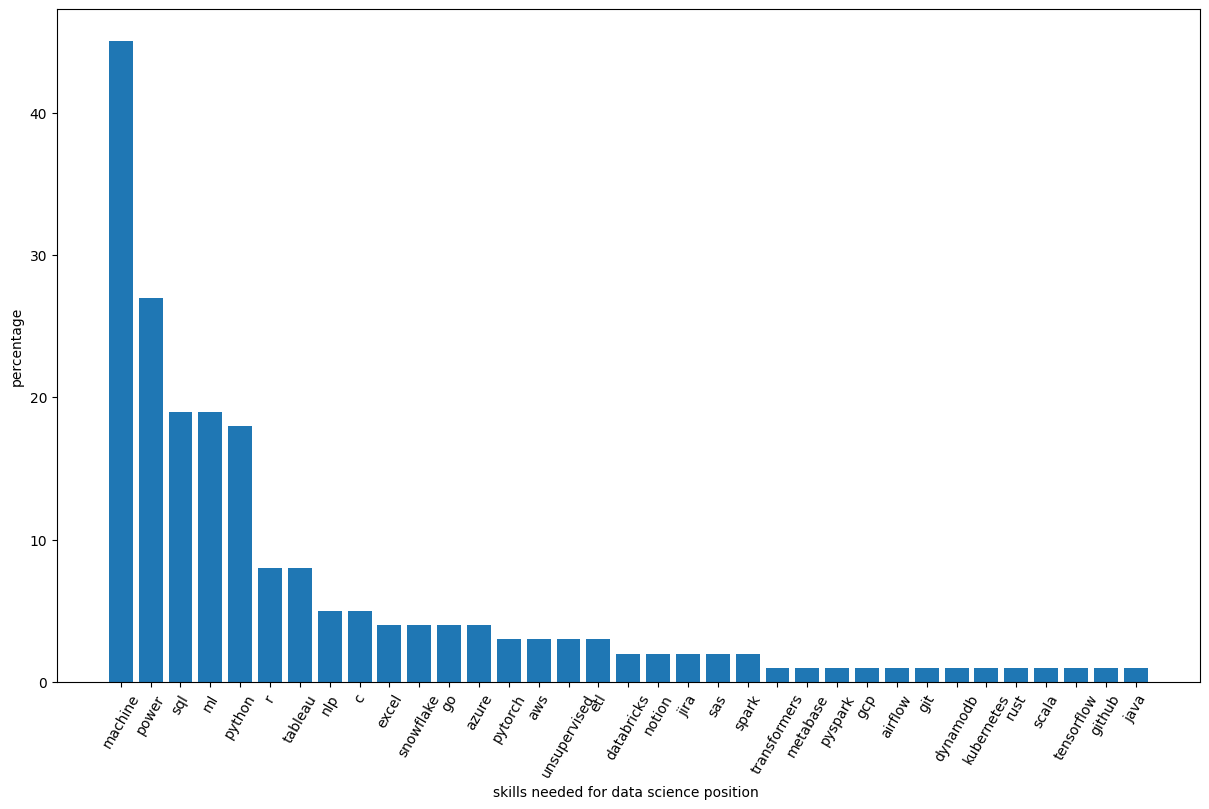

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.bar(descr_plot['skills'], descr_plot['percentage'])
plt.xticks(rotation=60)
plt.tight_layout()
plt.xlabel('skills needed for data science position ')
plt.ylabel('percentage')
plt.show()

/tmp/ipython-input-2926742361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = descr_plot, x='skills', y='percentage', palette="viridis")


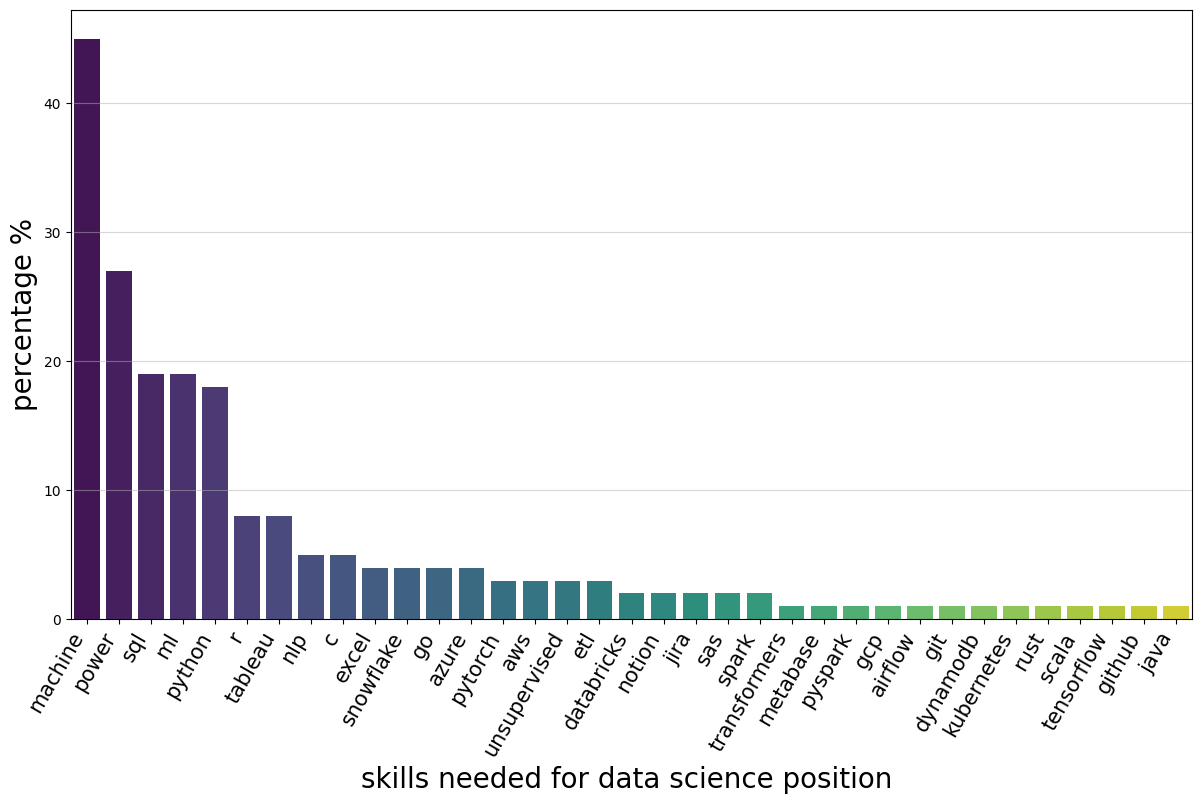

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plt.grid(True, alpha= 0.5)
sns.barplot(data = descr_plot, x='skills', y='percentage', palette="viridis")
plt.xticks(rotation=60, fontsize=15, ha= 'right')
plt.tight_layout()
plt.xlabel('skills needed for data science position ', fontsize=20)
plt.ylabel('percentage %', fontsize=20)
plt.show()

## **Experience level analysis:**

Counter({'Seniority level': 184, 'Mid-Senior level': 71, 'Entry level': 44, 'Not Applicable': 21, 'Associate': 19, 'Internship': 13, 'Director': 1})


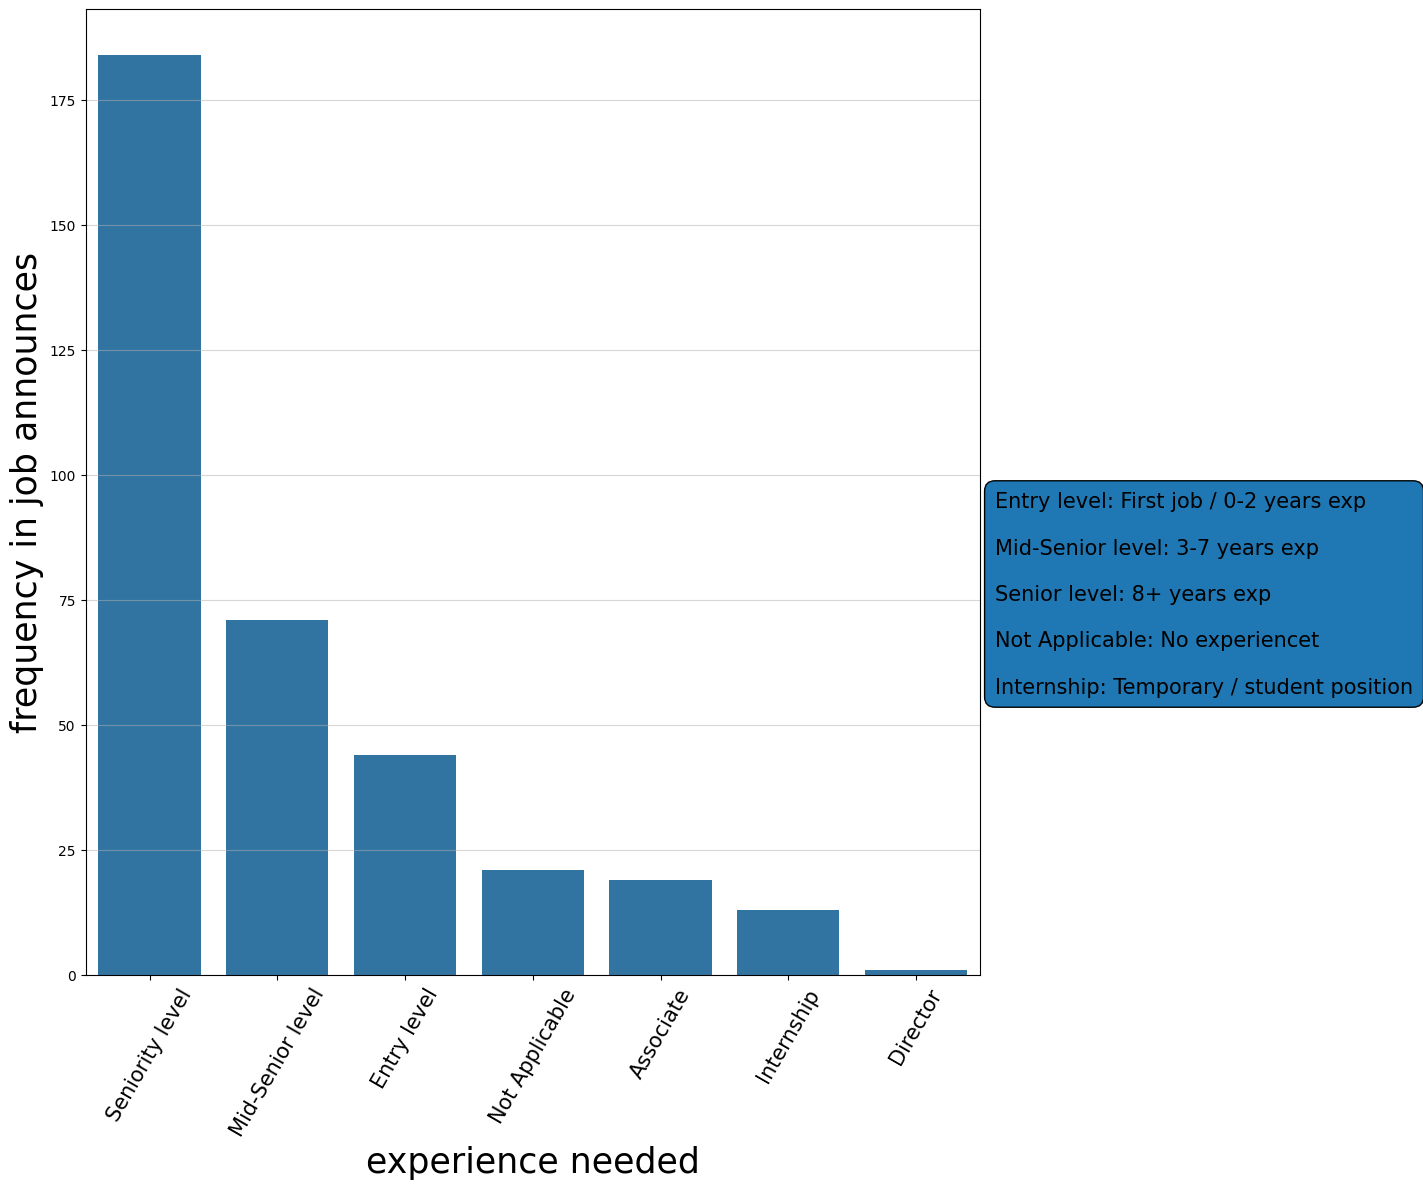

In [ ]:
experience = details['details'].dropna().str.split('\n').tolist()
whole = [ex for exp in experience for ex in exp]
fr = Counter(whole)
print(fr)
expert = pd.DataFrame(fr.items() , columns=['experience', 'details']).sort_values(by='details', ascending=False)



explanations = {
    "Entry level": "First job / 0-2 years exp",
    "Mid-Senior level": "3-7 years exp",
    "Senior level": "8+ years exp",
    "Not Applicable": "No experiencet",
    "Internship": "Temporary / student position"
}

plt.figure(figsize=(10,12))
plt.grid(True, alpha=0.5)
sns.barplot(data = expert, x='experience', y='details')
note = "\n\n".join([f"{k}: {v}" for k,v in explanations.items()])
plt.gcf().text(1, 0.5, note, fontsize=15, va='center',     bbox=dict(boxstyle="round,pad=0.5", edgecolor="black"))
plt.xticks(rotation= 60, fontsize=15)
plt.xlabel('experience needed', fontsize=25)
plt.ylabel('frequency in job announces', fontsize=25)
plt.tight_layout()
plt.show()

7


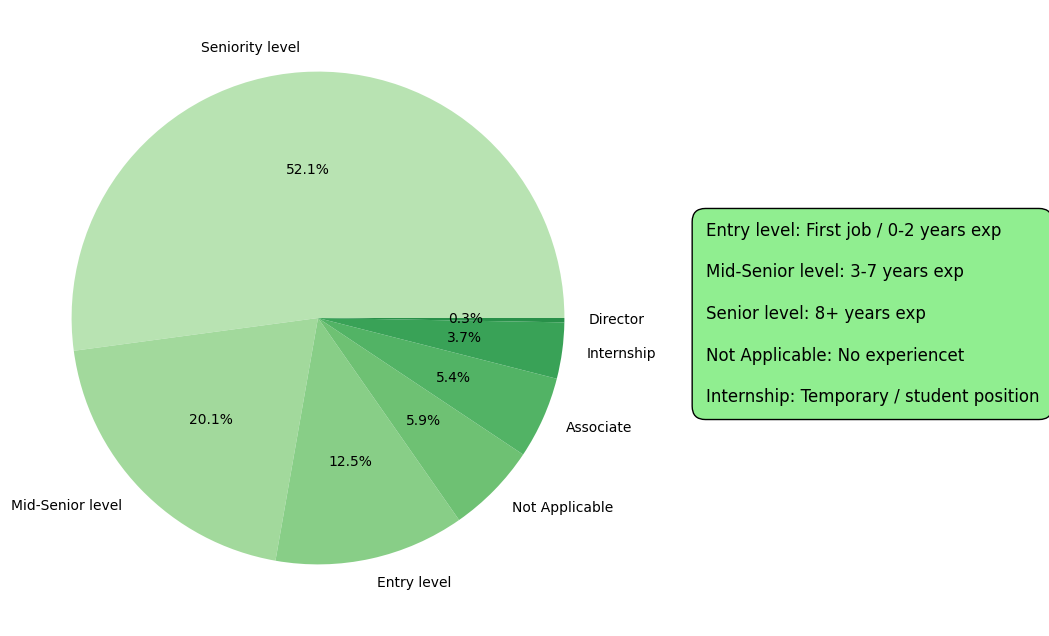

In [ ]:
labels = expert['experience']
vals = expert['details']

print(len(labels))
cmap = plt.get_cmap('Greens')
colors = [cmap(0.3+0.5*(i/len(labels))) for i in range(len(labels))]

note = '\n\n'.join(f'{o}: {j}' for o, j in explanations.items())

plt.figure(figsize=(10,8))
plt.pie(
    vals, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=0
)

plt.gcf().text(
    0.9, 0.5, note,
    fontsize=12, va='center',
    bbox=dict(boxstyle='round,pad=0.8', edgecolor='black', facecolor='lightgreen')
)

plt.show()


## **Salary Analysis :**

In [ ]:
payment = payment[payment['details'].notna()]
payment = payment[~payment['payment'].str.contains('/hr', na=False)]

payment[['min_salary', 'max_salary']] = payment['payment'].str.split('-', expand=True)

payment['min_salary'] = payment['min_salary'].str.replace(',', '').astype(float)
payment['max_salary'] = payment['max_salary'].str.replace(',', '').astype(float)
payment['average'] = payment[['min_salary', 'max_salary']].mean(axis=1)
payment = payment[payment['details'].notna()]


payment['details'] = payment['details'].str.replace('\n', '/')
payment[['max_exp','min_exp']] = payment['details'].str.split('/', expand=True)
salary_stacked = pd.concat([payment['min_salary'], payment['max_salary']], axis=0)
exp_stacked = pd.concat([payment['max_exp'], payment['min_exp']], axis=0)
d = pd.DataFrame({'salary':salary_stacked, 'exp':exp_stacked})
print(payment.head())
print(len(payment))

print(len(d))
print(d.sample(5))

                                                href                  payment  \
0  https://www.linkedin.com/jobs/view/data-analys...    56,000.00 - 70,000.00   
1  https://www.linkedin.com/jobs/view/data-scient...  140,000.00 - 175,000.00   
2  https://www.linkedin.com/jobs/view/data-scient...  140,000.00 - 235,000.00   
3  https://www.linkedin.com/jobs/view/data-scient...  123,200.00 - 196,800.00   
4  https://www.linkedin.com/jobs/view/bi-develope...  112,000.00 - 185,000.00   

                                         description  \
0  #WeAreParamount on a mission to unleash the po...   
1  About Us\n\nWe're on a mission to make it poss...   
2  About Us\n\nNotion helps you build beautiful t...   
3  About The Team\n\nZillow Group’s Agent Softwar...   
4  Company Description\n\nLinkedIn is the world’s...   

                            details  min_salary  max_salary   average  \
0  Seniority level/Mid-Senior level     56000.0     70000.0   63000.0   
1       Seniority level/Entry 

In [ ]:

salary_by_exp = d.groupby('exp')['salary'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
print(salary_by_exp)

                  count           mean    median       min       max  \
exp                                                                    
Associate            12  113690.000000   79250.0   78500.0  316000.0   
Entry level          18  156949.111111  142500.0   73300.0  300000.0   
Internship            3  185184.666667  177777.0  177777.0  200000.0   
Mid-Senior level     42  163902.476190  158584.5   55000.0  393300.0   
Not Applicable       14  248766.571429  219500.0  105458.0  720000.0   
Seniority level      89  114860.943820  111800.0   45000.0  248000.0   

                            std  
exp                              
Associate          69243.591893  
Entry level        64854.013655  
Internship         12830.455032  
Mid-Senior level   77088.582629  
Not Applicable    159637.498404  
Seniority level    42749.963155  


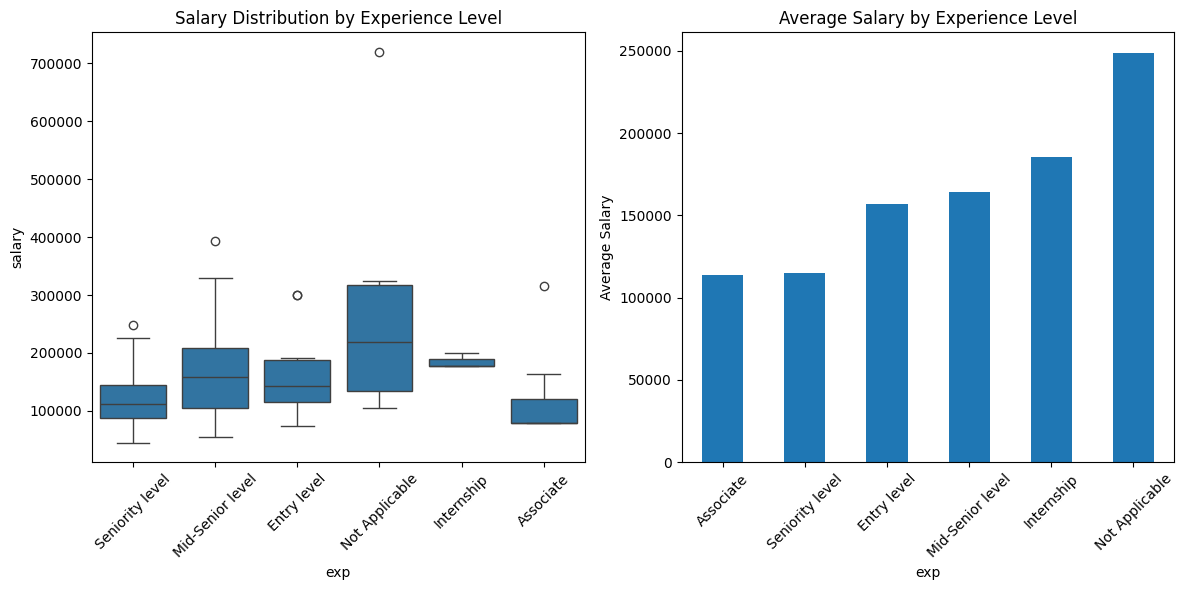

In [ ]:
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=d, x='exp', y='salary')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Experience Level')

# Bar plot with means
plt.subplot(1,2,2)
exp_means = d.groupby('exp')['salary'].mean().sort_values()
exp_means.plot(kind='bar')
plt.title('Average Salary by Experience Level')
plt.xticks(rotation=45)
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()